In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
file = 'consumption_prognosis'
area = 'DK2'
fileName = file + "_" + area

file_uppercase = 'Consumption prognosis'
file_lowercase = 'consumption prognosis'

#config
save_plots = True

data = pd.read_csv("../../data/data_sanitized/"+fileName+".csv") 
data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')
str_week_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ylabel = file_uppercase+' [MWh]'
ylabelTWh = file_uppercase+' [TWh]'

title = {}
title['avg_consumption_each_year'] = 'Average '+file_lowercase+' for each hour for years 2016-2020 (' + area + ")"
title['total_consumption_2019'] = 'Total '+file_lowercase+' per day for 2019 (' + area + ")"
title['total_consumption_2016_2019'] = 'Total '+file_lowercase+' for years 2016-2019 (' + area + ")"
title['median_per_dayofweek'] = 'Median '+file_lowercase+' for years 2016-2020 (' + area + ")"
title['std_per_dayofweek'] = 'Standard deviation of '+file_lowercase+' for years 2016-2020 (' + area + ")"
global_title = 'Average '+file_lowercase+' for years 2016-2020 (' + area + ")"

data['dayofweek'] = data['date'].dt.dayofweek
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear


data

,date,holiday,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,dayofweek,year,dayofyear
0,2016-01-01,1,1420.0,1369.0,1310.0,1199.0,1176.0,1177.0,1173.0,1225.0,...,1822.0,1801.0,1708.0,1605.0,1506.0,1403.0,1315.0,4,2016,1
1,2016-01-02,0,1223.0,1157.0,1142.0,1146.0,1135.0,1171.0,1239.0,1351.0,...,2079.0,2034.0,1902.0,1776.0,1665.0,1549.0,1459.0,5,2016,2
2,2016-01-03,1,1369.0,1308.0,1267.0,1208.0,1219.0,1266.0,1310.0,1399.0,...,1928.0,1929.0,1856.0,1715.0,1682.0,1557.0,1428.0,6,2016,3
3,2016-01-04,0,1357.0,1288.0,1256.0,1257.0,1288.0,1403.0,1672.0,1978.0,...,2327.0,2279.0,2107.0,1937.0,1799.0,1639.0,1470.0,0,2016,4
4,2016-01-05,0,1357.0,1300.0,1284.0,1290.0,1344.0,1457.0,1709.0,1993.0,...,2391.0,2307.0,2144.0,1969.0,1819.0,1697.0,1532.0,1,2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2020-05-08,1,1126.0,1064.0,1045.0,1043.0,1052.0,1050.0,1105.0,1215.0,...,1349.0,1349.0,1378.0,1330.0,1305.0,1235.0,1165.0,4,2020,129
1590,2020-05-09,0,1088.0,1036.0,1007.0,995.0,1002.0,996.0,1041.0,1144.0,...,1342.0,1405.0,1366.0,1315.0,1291.0,1238.0,1169.0,5,2020,130
1591,2020-05-10,1,1088.0,1031.0,1003.0,994.0,989.0,977.0,1019.0,1113.0,...,1387.0,1508.0,1467.0,1390.0,1349.0,1282.0,1188.0,6,2020,131
1592,2020-05-11,0,1108.0,1038.0,1022.0,1052.0,1053.0,1116.0,1278.0,1497.0,...,1619.0,1606.0,1527.0,1443.0,1401.0,1347.0,1259.0,0,2020,132


In [3]:
def savePlot(name):
    if(save_plots):
        fileName = 'plots/'+ name + '_' + area
        plt.savefig(fileName, bbox_inches='tight')

In [4]:
def draw_plot_hour(data_serie):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    # for column in columns:
    ax.plot(data_serie)
    # set title and legend
    ax.set_title('Plot')
    ax.legend()
    
def draw_plot_hour_for_year(data_frame, name='Plot', ylabel = 'y ax'):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for index, row in data_frame.iterrows():
        ax.plot(data_frame.loc[index], label=data_frame.loc[index].name)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 20})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    
def draw_two_plots_hour_for_year(data_frame, name=['Plot','Plot'], ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(nrows=2)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for holiday, new_df in data_frame.groupby(level=0):
        for index, row in new_df.iterrows():
            ax[index[0]].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[index[0]].set_title(name[index[0]])
            # set title and legend
            ax[index[0]].legend(prop={'size': 15})
            ax[index[0]].set_xlabel('Hour')
            ax[index[0]].set_ylabel(ylabel)

def draw_7_plots_hour_for_year(data_frame, name='Plot', ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(4, 2,sharey=True)
    fig.delaxes(ax[3,1])
    fig.set_figheight(14)
    fig.set_figwidth(20)
    fig.subplots_adjust(hspace=0.3)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for workday, new_df in data_frame.groupby(level=0):
        plot_index = int(workday/2),int(workday%2)
        for index, row in new_df.iterrows():
            ax[plot_index].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[int(index[0]/2),int(index[0]%2)].set_title(name[index[0]])
            # set title and legend
            ax[plot_index].legend(prop={'size': 9})
            ax[plot_index].set_xlabel('Hour')
            ax[plot_index].set_ylabel(ylabel)
            ax[plot_index].yaxis.set_tick_params(labelleft=True)
            
def draw_plot_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
            
def draw_simple_barplot_for_years(data_frame, name='Plot', ylabel = ylabel):
    fig, ax = plt.subplots()
    min_val = min(data_frame.iloc[:,0])
    max_val = max(data_frame.iloc[:,0])
    margin = (max_val - min_val)*3/10
    plt.ylim([min_val - margin,max_val + margin])
    ax.bar(data_frame.index,data_frame.iloc[:,0])
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(name)
    ax.set_xticks(data_frame.index)
    
def draw_plot_single_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    ax.plot(data_frame, label=data_frame.index)
    # set title and legend
    ax.set_title(name)
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks()[::14])

In [5]:
data_avg_by_year = data
data_avg_by_year['year']= data_avg_by_year['date'].dt.year
data_avg_by_year = data_avg_by_year.drop(columns=['holiday','date','dayofyear','dayofweek'])
data_avg_by_year = data_avg_by_year.groupby('year').mean()
data_avg_by_year

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
year,,,,,,,,,,,,,,,,,,,,,
2016,1177.759563,1122.366120,1096.898907,1096.688525,1112.612022,1179.407104,1336.494536,1527.825137,1644.071038,1705.054645,...,1679.759563,1657.136612,1690.166667,1789.409836,1783.827869,1695.330601,1598.997268,1511.428962,1404.598361,1280.128415
2017,1176.687671,1106.668493,1079.890411,1086.117808,1102.682192,1166.183562,1319.808219,1513.876712,1630.350685,1691.569863,...,1666.079452,1644.216438,1675.336986,1772.583562,1769.736986,1685.580822,1593.246575,1505.504110,1399.465753,1286.863014
2018,1209.509589,1139.290411,1112.483562,1120.060274,1136.221918,1199.142466,1351.290411,1541.621918,1658.660274,1720.372603,...,1692.197260,1671.882192,1706.441096,1801.983562,1795.509589,1709.805479,1617.569863,1530.454795,1425.060274,1316.178082
2019,1195.739726,1130.405479,1105.276712,1114.441096,1131.769863,1192.684932,1342.476712,1531.682192,1646.690411,1705.813699,...,1679.027397,1656.260274,1687.931507,1779.698630,1771.402740,1687.298630,1596.139726,1506.964384,1403.764384,1300.153425
2020,1253.691729,1199.473684,1178.597744,1189.872180,1210.503759,1274.210526,1418.864662,1586.428571,1690.000000,1742.075188,...,1688.496241,1659.902256,1692.548872,1807.849624,1834.992481,1748.631579,1643.676692,1548.135338,1438.857143,1340.827068


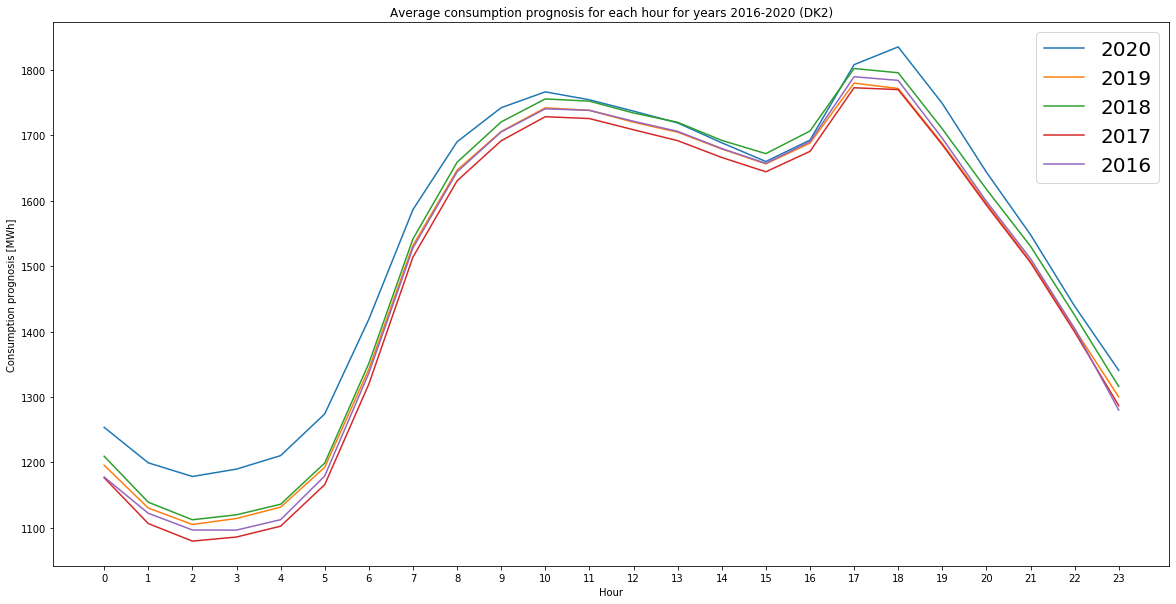

In [6]:
draw_plot_hour_for_year(data_avg_by_year, title['avg_consumption_each_year'], ylabel)
savePlot('avg_hour')

In [7]:
data_avg_by_year_per_holiday = data.copy()
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.drop(columns=['date','dayofyear','dayofweek'])
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.groupby(['holiday','year']).mean()
data_avg_by_year_per_holiday

0            1            2            3            4  \
holiday year                                                                    
0       2016  1176.567213  1122.550820  1099.180328  1102.511475  1122.698361   
        2017  1175.046053  1105.253289  1080.493421  1090.605263  1110.865132   
        2018  1205.397351  1135.125828  1110.473510  1122.089404  1142.331126   
        2019  1196.257426  1130.528053  1106.844884  1120.257426  1141.970297   
        2020  1257.174312  1203.706422  1185.000000  1200.440367  1224.266055   
1       2016  1183.721311  1121.442623  1085.491803  1067.573770  1062.180328   
        2017  1184.868852  1113.721311  1076.885246  1063.754098  1061.901639   
        2018  1229.222222  1159.253968  1122.119048  1110.333333  1106.936508   
        2019  1193.209677  1129.806452  1097.612903  1086.016129  1081.919355   
        2020  1237.875000  1180.250000  1149.520833  1141.875000  1148.000000   

                        5            6            7            8            9  \
holiday year                                                                    
0       2016  1200.298361  1378.298361  1587.986885  1702.222951  1754.078689   
        2017  1184.664474  1359.332237  1574.786184  1689.921053  1741.648026   
        2018  1215.410596  1387.937086  1597.596026  1712.692053  1765.665563   
        2019  1212.927393  1382.630363  1590.963696  1703.683168  1753.419142   
        2020  1297.798165  1463.788991  1650.385321  1750.541284  1792.302752   
1       2016  1074.950820  1127.475410  1227.016393  1353.311475  1459.934426   
        2017  1074.081967  1122.836066  1210.327869  1333.475410  1442.000000   
        2018  1121.158730  1175.619048  1273.301587  1399.650794  1503.253968   
        2019  1093.758065  1146.241935  1241.967742  1368.161290  1473.161290   
        2020  1167.083333  1214.833333  1295.958333  1415.041667  1513.958333   

              ...           14           15           16           17  \
holiday year  ...                                                       
0       2016  ...  1716.032787  1688.491803  1717.186885  1815.157377   
        2017  ...  1700.667763  1675.098684  1702.368421  1798.651316   
        2018  ...  1724.341060  1700.231788  1731.254967  1825.831126   
        2019  ...  1712.867987  1687.033003  1714.676568  1804.930693   
        2020  ...  1723.889908  1691.477064  1721.724771  1836.577982   
1       2016  ...  1498.393443  1500.360656  1555.065574  1660.672131   
        2017  ...  1493.704918  1490.311475  1540.622951  1642.672131   
        2018  ...  1538.111111  1535.984127  1587.492063  1687.666667   
        2019  ...  1513.645161  1505.870968  1557.225806  1656.387097   
        2020  ...  1527.750000  1516.500000  1560.041667  1677.375000   

                       18           19           20           21           22  \
holiday year                                                                    
0       2016  1802.652459  1710.685246  1612.183607  1523.065574  1414.924590   
        2017  1790.671053  1703.674342  1609.355263  1519.269737  1410.717105   
        2018  1813.447020  1725.526490  1630.824503  1541.569536  1433.966887   
        2019  1792.125413  1705.603960  1611.749175  1520.353135  1414.877888   
        2020  1857.779817  1767.963303  1660.073394  1561.082569  1449.321101   
1       2016  1689.704918  1618.557377  1533.065574  1453.245902  1352.967213   
        2017  1665.409836  1595.409836  1512.967213  1436.901639  1343.393443   
        2018  1709.523810  1634.444444  1554.031746  1477.174603  1382.365079   
        2019  1670.129032  1597.838710  1519.854839  1441.532258  1349.451613   
        2020  1731.500000  1660.833333  1569.208333  1489.333333  1391.333333   

                       23  
holiday year               
0       2016  1288.340984  
        2017  1295.414474  
        2018  1321.572848  
        2019  1308.511551  
        2020  1348.605505  
1       2016  1239.065574  
    

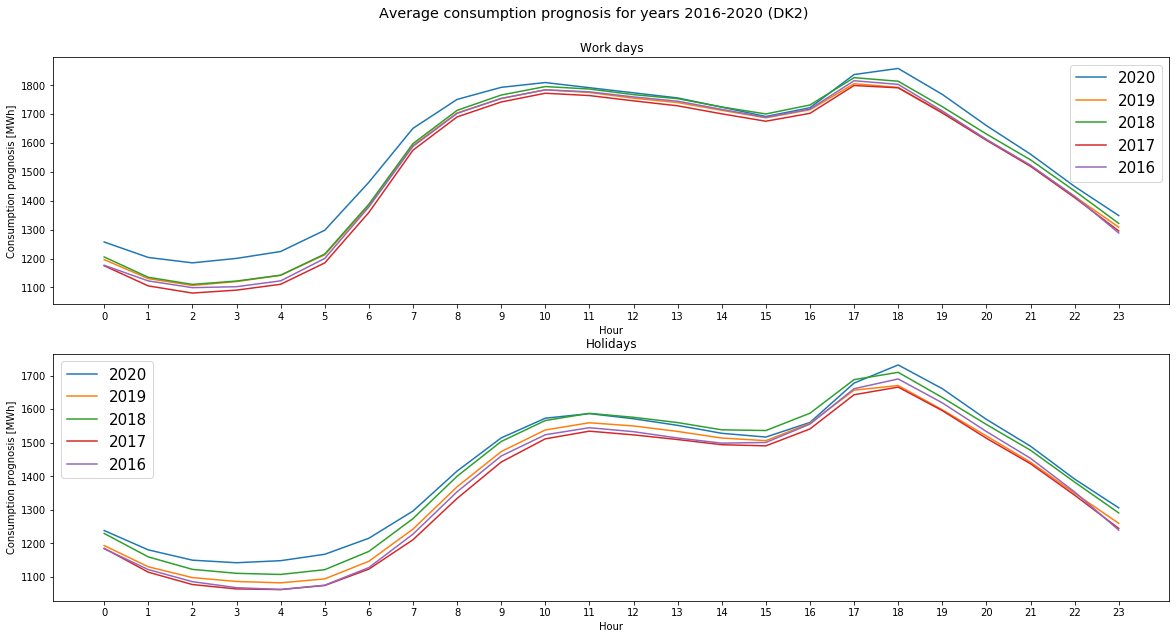

In [8]:
draw_two_plots_hour_for_year(data_avg_by_year_per_holiday, ['Work days','Holidays'], ylabel)
savePlot('avg_workday_holiday')

In [9]:
data_avg_by_year_per_dayofweek = data.copy()
df = data_avg_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_avg_by_year_per_dayofweek = df
data_avg_by_year_per_dayofweek

0            1            2            3  \
dayofweek year                                                       
0         2016  1135.897959  1087.142857  1069.346939  1076.755102   
          2017  1133.204082  1072.285714  1050.734694  1067.816327   
          2018  1179.346939  1114.795918  1091.448980  1108.571429   
          2019  1165.901961  1107.196078  1086.549020  1106.705882   
          2020  1242.333333  1189.777778  1168.611111  1191.555556   
1         2016  1176.019231  1124.480769  1105.153846  1115.673077   
          2017  1175.235294  1104.745098  1082.823529  1100.392157   
          2018  1202.260000  1130.840000  1112.520000  1130.740000   
          2019  1192.627451  1124.568627  1104.549020  1122.823529   
          2020  1231.052632  1186.315789  1172.157895  1192.526316   
2         2016  1178.076923  1127.615385  1108.211538  1114.923077   
          2017  1176.557692  1106.442308  1084.519231  1097.730769   
          2018  1201.666667  1133.666667  1114.176471  1131.450980   
          2019  1200.560000  1136.220000  1113.760000  1131.860000   
          2020  1258.777778  1198.500000  1184.055556  1207.222222   
3         2016  1187.360000  1134.080000  1110.420000  1114.340000   
          2017  1186.580000  1117.120000  1093.040000  1104.580000   
          2018  1211.940000  1139.460000  1114.980000  1128.820000   
          2019  1199.020408  1130.224490  1108.000000  1124.122449   
          2020  1272.222222  1218.222222  1200.888889  1221.611111   
4         2016  1179.160000  1124.320000  1100.520000  1104.420000   
          2017  1180.120000  1106.660000  1086.560000  1100.460000   
          2018  1220.880000  1147.960000  1121.640000  1135.920000   
          2019  1205.480000  1138.800000  1114.940000  1132.920000   
          2020  1284.352941  1231.117647  1210.882353  1224.529412   
5         2016  1201.057692  1136.134615  1100.192308  1088.000000   
          2017  1196.807692  1122.865385  1084.326923  1072.442308   
          2018  1215.442308  1143.326923  1107.730769  1097.557692   
          2019  1213.980769  1146.115385  1113.480769  1104.057692   
          2020  1257.263158  1200.947368  1176.052632  1168.736842   
6         2016  1179.403846  1117.019231  1080.326923  1062.519231   
          2017  1187.000000  1115.905660  1078.528302  1065.245283   
          2018  1213.538462  1144.000000  1106.548077  1095.923077   
          2019  1197.538462  1133.615385  1100.173077  1089.250000   
          2020  1252.894737  1194.842105  1164.342105  1153.473684   

                          4            5            6            7  \
dayofweek year                                                       
0         2016  1104.632653  1202.979592  1408.795918  1647.408163   
          2017  1096.571429  1185.081633  1383.734694  1619.612245   
          2018  1134.306122  1222.979592  1420.367347  1647.959184   
          2019  1132.588235  1215.921569  1408.215686  1632.549020   
          2020  1218.944444  1304.222222  1499.166667  1704.388889   
1         2016  1142.250000  1233.980769  1435.442308  1656.019231   
          2017  1122.450980  1208.176471  1408.901961  1643.019608   
          2018  1156.200000  1236.500000  1432.720000  1667.380000   
          2019  1149.647059  1235.254902  1428.823529  1656.607843   
          2020  1220.473684  1306.842105  1493.000000  1697.842105   
2         2016  1138.903846  1227.076923  1427.288462  1661.730769   
          2017  1121.634615  1206.692308  1405.942308  1648.961538   
          2018  1156.568627  1243.294118  1443.333333  1677.235294   
          2019  1156.200000  1239.360000  1430.320000  1659.660000   
          2020  1236.444444  1320.111111  1514.000000  1720.611111   
3         2016  1138.680000  1226.520000  1430.380000  1660.540000   
          2017  1131.880000  1217.800000  1417.340000  1656.640000   
          2018  1153.860000  1237.320000  1432.140000  1660.860000   
          2019  1150.204082  1231.2

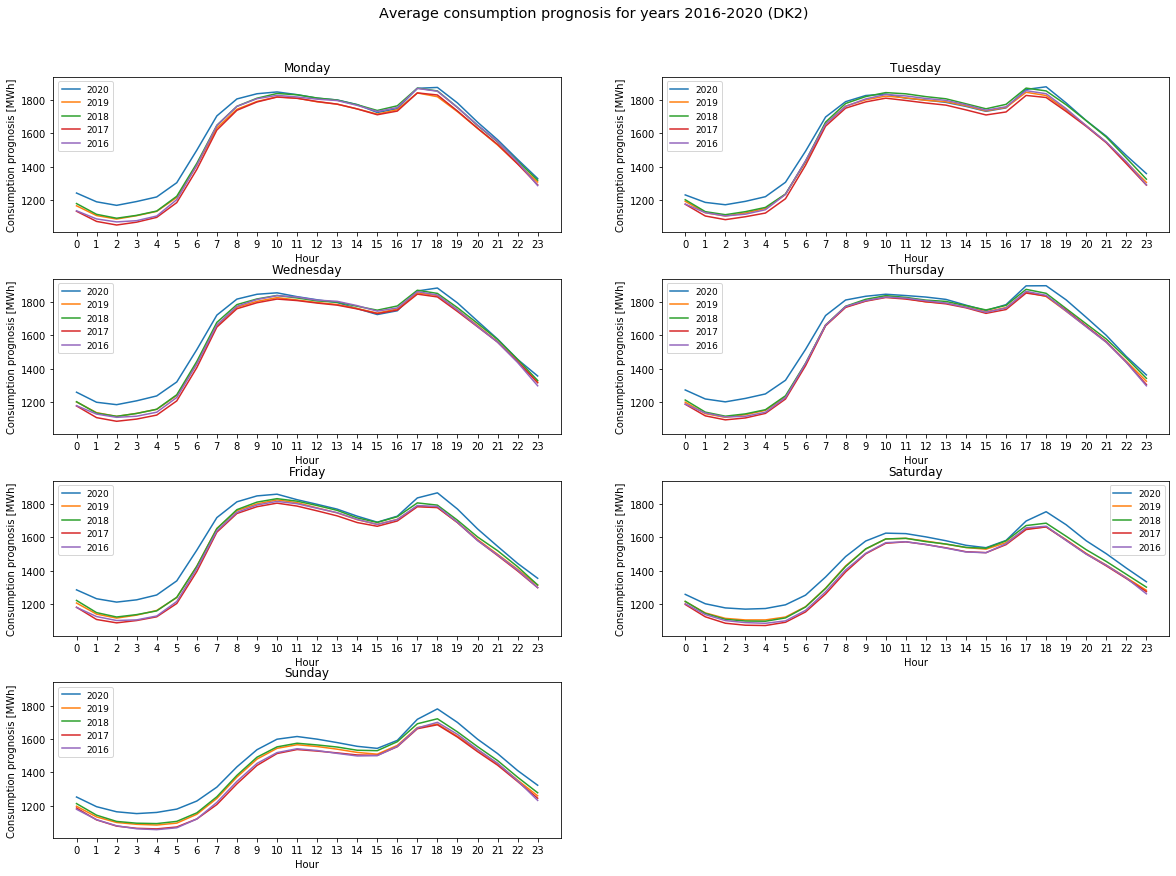

In [10]:
draw_7_plots_hour_for_year(data_avg_by_year_per_dayofweek, str_week_list, ylabel)
savePlot('avg_dayofweek')

In [11]:
data_std_by_year_per_dayofweek = data.copy()
df = data_std_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).std()
data_std_by_year_per_dayofweek = df
data_std_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016  117.548260  111.307008  111.194752  114.905311  125.702309   
          2017  114.992569  117.766895  119.653105  125.946694  137.745236   
          2018  153.824650  155.625349  158.590151  168.859286  175.409189   
          2019  110.394068  111.803402  110.516300  117.168135  126.442426   
          2020   76.622067   77.577707   75.398657   77.914902   81.705693   
1         2016  101.999133   98.999404   99.186176  108.657173  122.432354   
          2017  113.408393  119.374343  122.309886  126.581370  137.664129   
          2018  135.090568  135.034744  137.636202  144.628279  152.582932   
          2019  102.154581  101.644529  101.575452  109.003432  118.690998   
          2020   72.533880   71.540239   81.389505   77.439129   77.474274   
2         2016  115.596297  113.813255  110.771862  112.672151  124.863888   
          2017  102.605166  110.231737  115.871716  124.024368  136.454119   
          2018  133.288059  132.849188  131.513149  140.480079  151.426187   
          2019  101.328353  103.560352  107.665120  113.451061  121.512408   
          2020   80.838660   77.150159   78.145018   77.902319   77.683538   
3         2016  115.528556  112.321303  114.880078  119.800959  131.350822   
          2017  116.661920  121.523936  121.801438  125.582088  136.837106   
          2018  136.617507  132.254734  135.563298  141.533394  150.186960   
          2019  103.653970  103.128008  104.865787  111.104799  118.730433   
          2020   72.750626   67.666618   69.807204   75.339341   73.469659   
4         2016  113.706633  112.179783  112.636899  117.854994  131.212899   
          2017  126.429401  129.143902  132.814303  135.748298  144.542487   
          2018  138.054653  142.475484  149.382233  157.925562  167.280199   
          2019  106.734314  107.207219  107.551110  113.910248  121.413749   
          2020   72.490466   65.838707   63.072262   64.369167   64.262273   
5         2016  114.834307  113.695160  110.841176  112.277318  122.604004   
          2017  120.850749  118.524760  117.153615  119.506241  131.659169   
          2018  141.455656  138.664176  138.436949  137.326206  147.739386   
          2019  111.574031  113.116573  111.093758  110.472499  117.047399   
          2020   88.727950   82.744905   78.529169   80.233577   80.139024   
6         2016  118.051212  116.877763  115.493438  114.616751  124.778174   
          2017  138.420485  135.100855  134.952927  135.905638  143.894732   
          2018  152.574696  149.728382  152.806723  156.562691  164.301869   
          2019  111.246319  111.431181  113.813482  113.050548  116.305449   
          2020   88.346474   89.510560   87.875552   84.118546   82.344377   

                         5           6           7           8           9  \
dayofweek year                                                               
0         2016  143.470887  174.808703  199.498321  191.969607  177.057067   
          2017  152.510360  181.628487  197.874836  184.634266  168.058324   
          2018  175.020771  191.558487  218.305974  204.375434  184.475362   
          2019  143.118810  170.442285  192.332765  175.821909  153.907688   
          2020   91.166012  114.433258  140.987333  131.937547  121.951078   
1         2016  140.303661  170.551403  190.545604  175.602608  162.441316   
          2017  151.744352  179.903002  201.938752  189.209391  172.410818   
          2018  162.286752  188.641333  205.653651  195.378178  181.549741   
          2019  135.742085  164.061782  186.233625  173.428598  152.969888   
          2020   88.913356  113.499878  150.027502  144.437789  139.029699   
2         2016  142.425742  168.901913  192.029115  181.966325  163.470989   
          2017  150.715618  174.643886  190.833976  175.570480  161.201170   
          2018  160.470221  186.433652  208.89

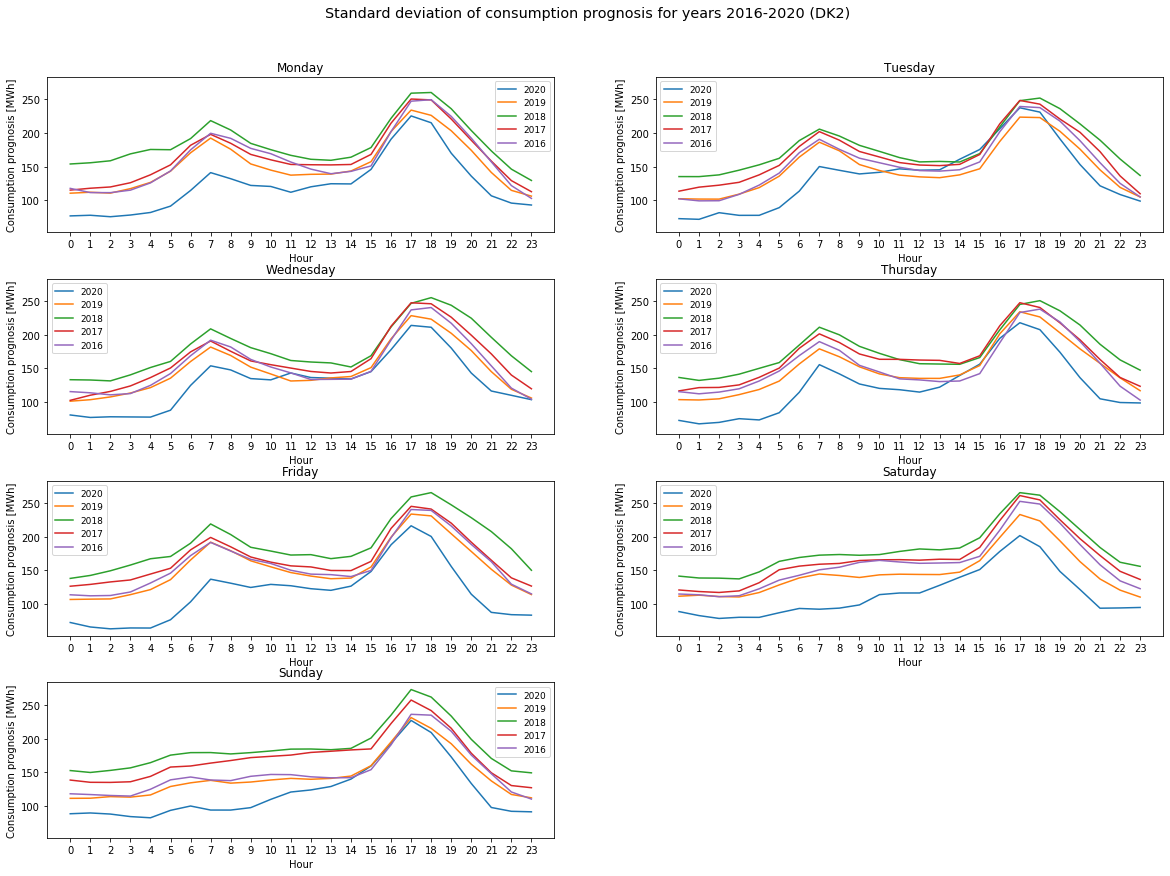

In [12]:
draw_7_plots_hour_for_year(data_std_by_year_per_dayofweek, str_week_list, ylabel, title['std_per_dayofweek'])
savePlot('std_dayofweek')

In [13]:
data_median_by_year_per_dayofweek = data.copy()
df = data_median_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_median_by_year_per_dayofweek = df
data_median_by_year_per_dayofweek

0            1            2            3  \
dayofweek year                                                       
0         2016  1135.897959  1087.142857  1069.346939  1076.755102   
          2017  1133.204082  1072.285714  1050.734694  1067.816327   
          2018  1179.346939  1114.795918  1091.448980  1108.571429   
          2019  1165.901961  1107.196078  1086.549020  1106.705882   
          2020  1242.333333  1189.777778  1168.611111  1191.555556   
1         2016  1176.019231  1124.480769  1105.153846  1115.673077   
          2017  1175.235294  1104.745098  1082.823529  1100.392157   
          2018  1202.260000  1130.840000  1112.520000  1130.740000   
          2019  1192.627451  1124.568627  1104.549020  1122.823529   
          2020  1231.052632  1186.315789  1172.157895  1192.526316   
2         2016  1178.076923  1127.615385  1108.211538  1114.923077   
          2017  1176.557692  1106.442308  1084.519231  1097.730769   
          2018  1201.666667  1133.666667  1114.176471  1131.450980   
          2019  1200.560000  1136.220000  1113.760000  1131.860000   
          2020  1258.777778  1198.500000  1184.055556  1207.222222   
3         2016  1187.360000  1134.080000  1110.420000  1114.340000   
          2017  1186.580000  1117.120000  1093.040000  1104.580000   
          2018  1211.940000  1139.460000  1114.980000  1128.820000   
          2019  1199.020408  1130.224490  1108.000000  1124.122449   
          2020  1272.222222  1218.222222  1200.888889  1221.611111   
4         2016  1179.160000  1124.320000  1100.520000  1104.420000   
          2017  1180.120000  1106.660000  1086.560000  1100.460000   
          2018  1220.880000  1147.960000  1121.640000  1135.920000   
          2019  1205.480000  1138.800000  1114.940000  1132.920000   
          2020  1284.352941  1231.117647  1210.882353  1224.529412   
5         2016  1201.057692  1136.134615  1100.192308  1088.000000   
          2017  1196.807692  1122.865385  1084.326923  1072.442308   
          2018  1215.442308  1143.326923  1107.730769  1097.557692   
          2019  1213.980769  1146.115385  1113.480769  1104.057692   
          2020  1257.263158  1200.947368  1176.052632  1168.736842   
6         2016  1179.403846  1117.019231  1080.326923  1062.519231   
          2017  1187.000000  1115.905660  1078.528302  1065.245283   
          2018  1213.538462  1144.000000  1106.548077  1095.923077   
          2019  1197.538462  1133.615385  1100.173077  1089.250000   
          2020  1252.894737  1194.842105  1164.342105  1153.473684   

                          4            5            6            7  \
dayofweek year                                                       
0         2016  1104.632653  1202.979592  1408.795918  1647.408163   
          2017  1096.571429  1185.081633  1383.734694  1619.612245   
          2018  1134.306122  1222.979592  1420.367347  1647.959184   
          2019  1132.588235  1215.921569  1408.215686  1632.549020   
          2020  1218.944444  1304.222222  1499.166667  1704.388889   
1         2016  1142.250000  1233.980769  1435.442308  1656.019231   
          2017  1122.450980  1208.176471  1408.901961  1643.019608   
          2018  1156.200000  1236.500000  1432.720000  1667.380000   
          2019  1149.647059  1235.254902  1428.823529  1656.607843   
          2020  1220.473684  1306.842105  1493.000000  1697.842105   
2         2016  1138.903846  1227.076923  1427.288462  1661.730769   
          2017  1121.634615  1206.692308  1405.942308  1648.961538   
          2018  1156.568627  1243.294118  1443.333333  1677.235294   
          2019  1156.200000  1239.360000  1430.320000  1659.660000   
          2020  1236.444444  1320.111111  1514.000000  1720.611111   
3         2016  1138.680000  1226.520000  1430.380000  1660.540000   
          2017  1131.880000  1217.800000  1417.340000  1656.640000   
          2018  1153.860000  1237.320000  1432.140000  1660.860000   
          2019  1150.204082  1231.2

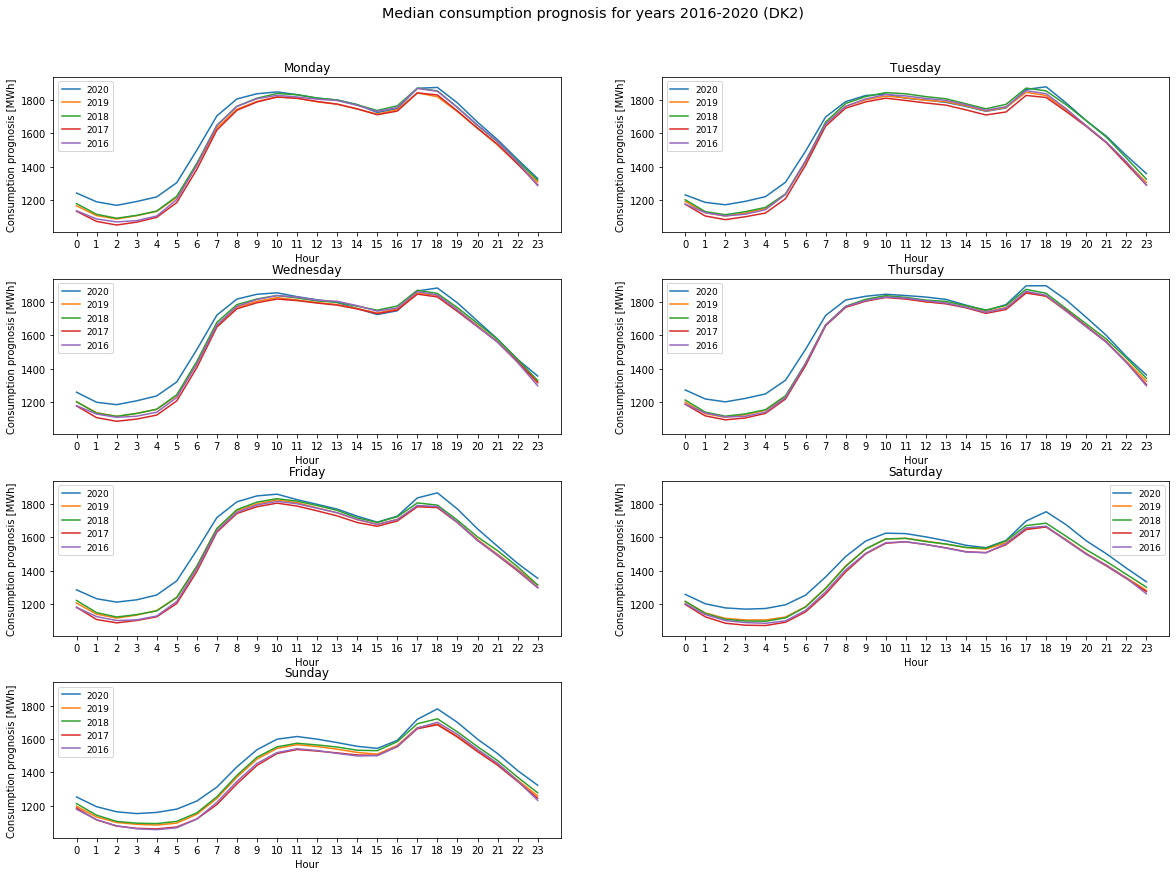

In [14]:
draw_7_plots_hour_for_year(data_median_by_year_per_dayofweek, str_week_list, ylabel, title['median_per_dayofweek'])
savePlot('median_dayofweek')

In [15]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear              
2016 1          34807.000000
     2          36198.000000
     3          36812.333333
     4          38600.000000
     5          39843.000000
...                      ...
2020 129        33141.928571
     130        33034.642857
     131        32938.642857
     132        32921.500000
     133        32982.071429

[1594 rows x 1 columns]

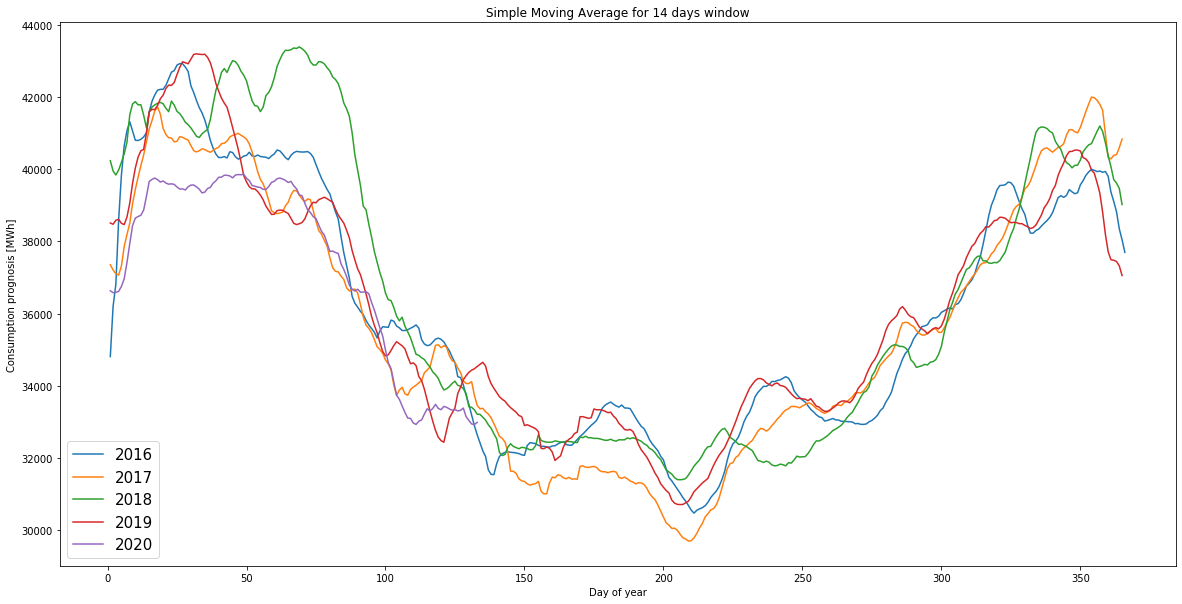

In [16]:
draw_plot_dayofyear(data_total_per_day_of_year, 'Simple Moving Average for 14 days window',ylabel)
savePlot('sma_14days')

In [17]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear              
2016 1          34807.000000
     2          36198.000000
     3          36812.333333
     4          38600.000000
     5          39843.000000
...                      ...
2020 129        33141.928571
     130        33034.642857
     131        32938.642857
     132        32921.500000
     133        32982.071429

[1594 rows x 1 columns]

In [18]:
data_per_year = data.copy()
df = data_per_year
df = df.drop(columns=['holiday','date','dayofweek','dayofyear'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour"})
df = df.groupby(['year']).sum()
df.iloc[:,0] = df.iloc[:,0] / 1000000
df = df.iloc[:-1,:]
data_per_year = df
data_per_year

,0
year,
2016,13.174438
2017,13.040168
2018,13.292284
2019,13.165580


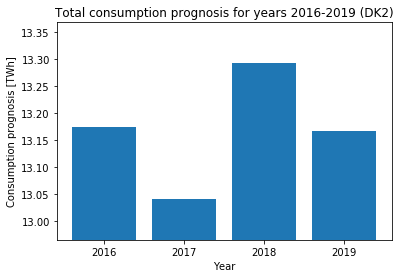

In [19]:
draw_simple_barplot_for_years(data_per_year,title['total_consumption_2016_2019'], ylabel = ylabelTWh)
savePlot('total_year')

In [20]:
data_one_year = data.copy()
df = data_one_year
df['day'] = df['date'].dt.strftime('%m-%d')
df = df[df.year == 2019]
# df = df.set_index(['day'])
df = df.drop(columns=['date','year','holiday','dayofweek','dayofyear'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['day']).stack().reset_index()
df = df.groupby(['day']).sum()
data_one_year = df

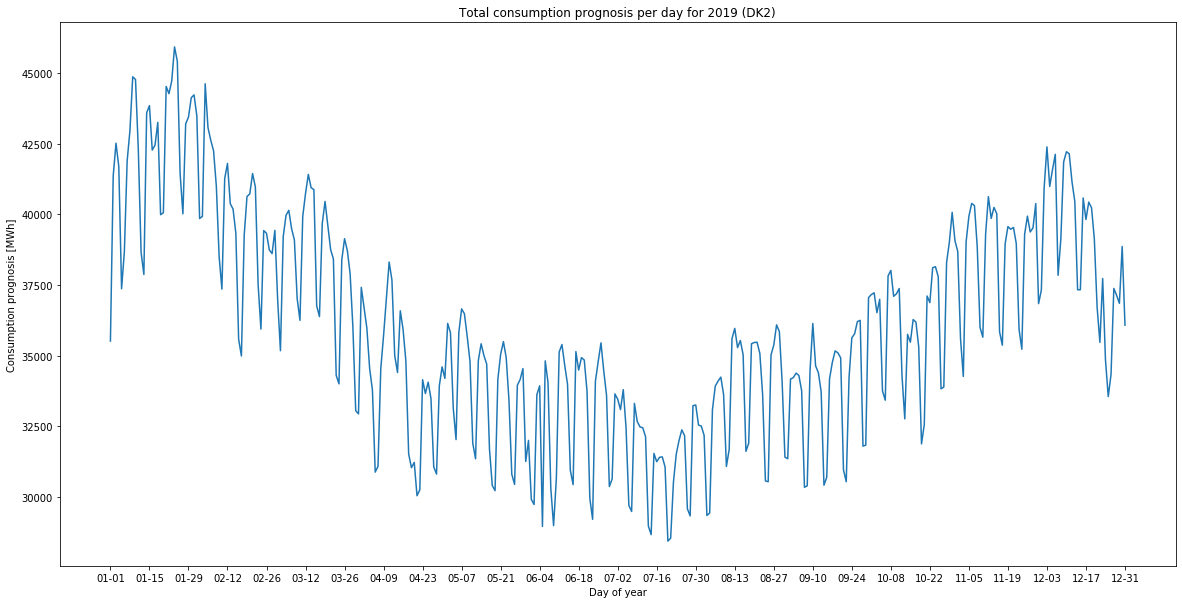

In [21]:
draw_plot_single_dayofyear(data_one_year, title['total_consumption_2019'])
savePlot('total_day_2019')